In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [9]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,-0.986,-0.688,-0.744,-0.454,-0.600,-1.121,NaN,-1.136,-1.086,-0.706,-0.376,-0.965,NaN,-1.311,NaN,-1.033,-0.986,-0.944,-0.738,-0.269,-0.997,-1.182,NaN,-0.956,-1.133,-0.800,-0.735,NaN,-0.756,NaN,-1.374,-1.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.340,2.772,2.077,2.699,2.173,2.724,2.559,1.704,2.190,2.655,1.838,2.159,1.572,2.181,NaN,1.503,3.214,3.521,2.520,2.442,NaN,1.579,NaN,2.171,2.152,3.157,2.291,3.047,1.898,2.714,NaN,1.411,2.389,3.121,2.806,NaN,2.094,NaN,2.726,1.675
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-0.442,-0.692,-0.653,-0.289,-0.518,-0.454,-0.900,-0.701,-0.476,-0.811,-0.623,-0.503,-0.229,-0.569,NaN,-0.662,0.435,-0.592,-0.613,-0.740,NaN,-0.422,NaN,-0.401,-0.583,-0.885,-0.778,-0.403,-0.969,-0.667,NaN,-0.700,-0.395,-0.853,-0.732,NaN,-0.705,NaN,-0.555,-0.637
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.026,-0.156,0.190,0.085,0.238,0.346,-0.599,-0.131,0.557,0.220,0.750,-0.166,1.155,-0.130,NaN,0.258,0.585,0.190,1.309,-0.005,NaN,0.694,NaN,0.312,0.870,0.181,0.972,-0.029,1.078,-0.083,NaN,0.099,1.263,0.912,1.407,NaN,1.855,NaN,0.355,0.310
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.131,-0.177,-0.151,

In [10]:
import itertools

pseudo_features_value = list(itertools.product([0, 1], repeat=4))
pseudo_cell_types = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']


for i, cell_type in enumerate(pseudo_cell_types):
    for j, assay in enumerate(assays):
        if pseudo_features_value[i][j] == 1:
            MPRA_df[f'{cell_type}_{assay}'] = 2
        else:
            MPRA_df[f'{cell_type}_{assay}'] = -2


MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,0000_DNase,0000_H3K4me3,0000_H3K27ac,0000_CTCF,0001_DNase,0001_H3K4me3,0001_H3K27ac,0001_CTCF,0010_DNase,0010_H3K4me3,0010_H3K27ac,0010_CTCF,0011_DNase,0011_H3K4me3,0011_H3K27ac,0011_CTCF,0100_DNase,0100_H3K4me3,0100_H3K27ac,0100_CTCF,0101_DNase,0101_H3K4me3,0101_H3K27ac,0101_CTCF,0110_DNase,0110_H3K4me3,0110_H3K27ac,0110_CTCF,0111_DNase,0111_H3K4me3,0111_H3K27ac,0111_CTCF,1000_DNase,1000_H3K4me3,1000_H3K27ac,1000_CTCF,1001_DNase,1001_H3K4me3,1001_H3K27ac,1001_CTCF,1010_DNase,1010_H3K4me3,1010_H3K27ac,1010_CTCF,1011_DNase,1011_H3K4me3,1011_H3K27ac,1011_CTCF,1100_DNase,1100_H3K4me3,1100_H3K27ac,1100_CTCF,1101_DNase,1101_H3K4me3,1101_H3K27ac,1101_CTCF,1110_DNase,1110_H3K4me3,1110_H3K27ac,1110_CTCF,1111_DNase,1111_H3K4me3,1111_H3K27ac,1111_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,2,-2,-2,2,2,-2,2,2,2,2,-2,2,2,2,2
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,2,-2,-2,2,2,-2,2,2,2,2,-2,2,2,2,2
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,2,-2,-2,2,2,-2,2,2,2,2,-2,2,2,2,2
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,2,-2,-2,2,2,-2,2,2,2,2,-2,2,2,2,2
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,-0.986,-0.688,-0.744,-0.454,-0.600,-1.121,NaN,-1.136,-1.086,-0.706,-0.376,-0.965,NaN,-1.311,NaN,-1.033,-0.986,-0.944,-0.738,-0.269,-0.997,-1.182,NaN,-0.956,-1.133,-0.800,-0.735,NaN,-0.756,NaN,-1.374,-1.089,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,

In [11]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_pseudo_feature_0601.csv', index=False)

In [12]:
cell_types = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

y_pred = np.load(f'../saved/0529_Gosai_MPRA_MyResTransformer3_seq_epi/0530_033808/pseudo_pred.npy')

cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [13]:
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,0000_DNase,0000_H3K4me3,0000_H3K27ac,0000_CTCF,0001_DNase,0001_H3K4me3,0001_H3K27ac,0001_CTCF,0010_DNase,0010_H3K4me3,0010_H3K27ac,0010_CTCF,0011_DNase,0011_H3K4me3,0011_H3K27ac,0011_CTCF,0100_DNase,0100_H3K4me3,0100_H3K27ac,0100_CTCF,0101_DNase,0101_H3K4me3,0101_H3K27ac,0101_CTCF,0110_DNase,0110_H3K4me3,0110_H3K27ac,0110_CTCF,0111_DNase,0111_H3K4me3,0111_H3K27ac,0111_CTCF,1000_DNase,1000_H3K4me3,1000_H3K27ac,1000_CTCF,1001_DNase,1001_H3K4me3,1001_H3K27ac,1001_CTCF,1010_DNase,1010_H3K4me3,1010_H3K27ac,1010_CTCF,1011_DNase,1011_H3K4me3,1011_H3K27ac,1011_CTCF,1100_DNase,1100_H3K4me3,1100_H3K27ac,1100_CTCF,1101_DNase,1101_H3K4me3,1101_H3K27ac,1101_CTCF,1110_DNase,1110_H3K4me3,1110_H3K27ac,1110_CTCF,1111_DNase,1111_H3K4me3,1111_H3K27ac,1111_CTCF,0000_pred,0001_pred,0010_pred,0011_pred,0100_pred,0101_pred,0110_pred,0111_pred,1000_pred,1001_pred,1010_pred,1011_pred,1100_pred,1101_pred,1110_pred,1111_pred
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,2,-2,-2,2,2,-2,2,2,2,2,-2,2,2,2,2,0.415,0.729,1.225,1.040,0.288,0.332,1.461,1.185,0.775,1.067,1.628,1.354,0.431,0.421,2.145,1.940
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,2,-2,-2,2,2,-2,2,2,2,2,-2,2,2,2,2,0.543,0.885,1.488,1.230,0.407,0.450,1.612,1.317,0.940,1.219,1.860,1.587,0.578,0.575,2.332,2.139
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,2,-2,-2,2,2,-2,2,2,2,2,-2,2,2,2,2,-0.098,0.173,0.507,0.026,0.621,0.168,1.307,0.519,0.581,0.738,0.727,0.495,1.715,0.951,2.091,1.980
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539,-2,-2,-2,-2,-2,-2,-2,2,-2,-2,2,-2,-2,-2,2,2,-2,2,-2,-2,-2,2,-2,2,-2,2,2,-2,-2,2,2,2,2,-2,-2,-2,2,-2,-2,2,2,-2,2,-2,2,-2,2,2,2,2,-2,-2,2,2,-2,2,2,2,2,-2,2,2,2,2,0.010,0.264,0.610,0.063,0.700,0.218,1.362,0.570,0.776,0.833,0.858,0.577

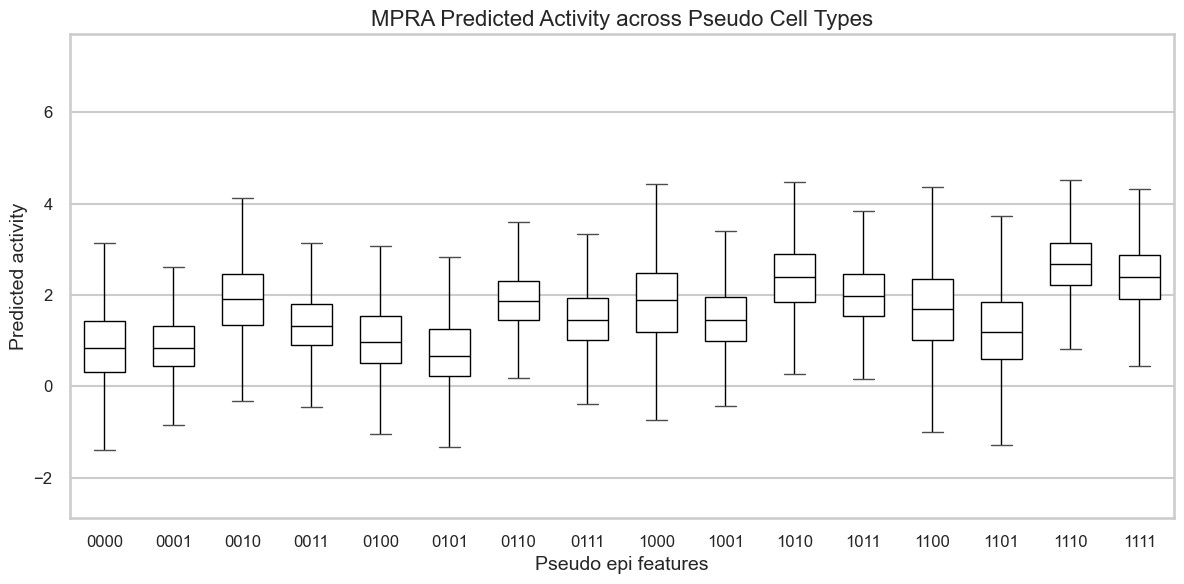

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 提取所有 pseudo cell type pred 列
cell_types_pred = [f'{i:04b}_pred' for i in range(16)]

# melt 宽表为长表
plot_df = MPRA_df[cell_types_pred].melt(var_name='cell_type', value_name='activity')

plot_df['cell_type'] = plot_df['cell_type'].str.replace('_pred', '', regex=False)

# 去掉空值（NaN）
plot_df = plot_df.dropna()

# 画图
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_df,
            x="cell_type",
            y="activity",
            fliersize=0,
            width=0.6,
            boxprops={"facecolor": "white", "edgecolor": "black"},
            whiskerprops={"color": "black"},
            medianprops={"color": "black"})

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Pseudo epi features", fontsize=14)
plt.ylabel("Predicted activity", fontsize=14)
plt.title("MPRA Predicted Activity across Pseudo Cell Types", fontsize=16)
plt.tight_layout()
plt.show()

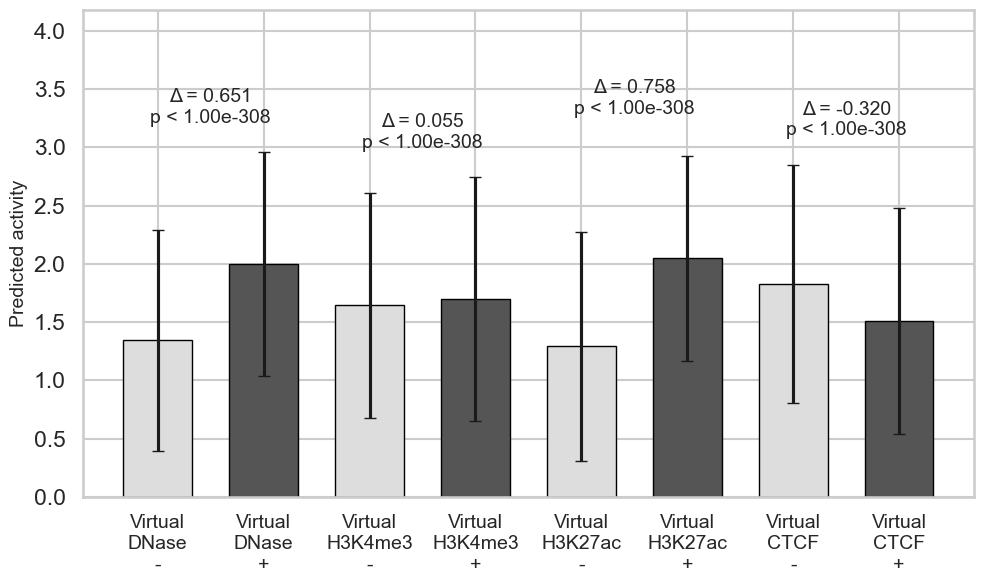

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# ============== 预处理（与原来相同） ==============
cell_types_pred = [f'{i:04b}_pred' for i in range(16)]
plot_df = MPRA_df[cell_types_pred].melt(var_name='cell_type', value_name='activity')
plot_df['cell_type'] = plot_df['cell_type'].str.replace('_pred', '', regex=False)
plot_df = plot_df.dropna()

for i in range(4):
    plot_df[f'bit_{i}'] = plot_df['cell_type'].str[i]

bit_labels = [
    "Virtual\nDNase",
    "Virtual\nH3K4me3",
    "Virtual\nH3K27ac",
    "Virtual\nCTCF"
]

# ============== 计算每组统计量 ==============
means, sems, diffs, pvals = [], [], [], []
for i in range(4):
    bit_col = f'bit_{i}'
    g0 = plot_df.loc[plot_df[bit_col] == '0', 'activity']
    g1 = plot_df.loc[plot_df[bit_col] == '1', 'activity']
    
    means.extend([g0.mean(), g1.mean()])
    sems.extend([g0.std(),  g1.std()])
    
    diffs.append(g1.mean() - g0.mean())
    pvals.append(ttest_ind(g0, g1, equal_var=False).pvalue)

# ============== 绘图 ==============
x = np.arange(8)                        # 8 根柱子的 x 轴位置
fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = ['#dddddd', '#555555']*4   # 一浅一深循环

bars = ax.bar(
    x, means, yerr=sems, width=0.65,
    capsize=4, color=bar_colors, edgecolor='black', linewidth=1
)

# x 轴标签：每两根为一组
xtick_labels = sum([[f'{lbl}\n-', f'{lbl}\n+'] for lbl in bit_labels], [])
ax.set_xticks(x)
ax.set_xticklabels(xtick_labels, fontsize=14)

ax.set_ylabel("Predicted activity", fontsize=14)
ax.set_ylim(0, max(means) + max(sems) + 0.15*plot_df['activity'].max())

# 在每组中央添加 Δ 和 p
for i in range(4):
    x_mid = i*2 + 0.5                       # 组中央 x
    y_top = max(means[i*2:i*2+2]) + max(sems[i*2:i*2+2]) + 0.03*plot_df['activity'].max()
    
    if pvals[i] == 0.0:
         ax.text(
            x_mid, y_top,
            f"Δ = {diffs[i]:.3f}\np < 1.00e-308",
            ha='center', va='bottom', fontsize=14
        )
    else:
        ax.text(
            x_mid, y_top,
            f"Δ = {diffs[i]:.3f}\np = {pvals[i]:.2e}",
            ha='center', va='bottom', fontsize=14
        )

plt.tight_layout()
plt.savefig('figures/Gosai_MPRA_pseudo_epi_compare.png', dpi=400)
plt.show()